# Treating the Observed Data from API.
## Example with output file from the query running on the lab server


In [1]:
import pandas as pd
#obs = pd.read_csv('/home/github/RNA_Operacional_WRF/files/obs_data/hourly_data.csv')
import sys
sys.path.append('/home/github/RNA_Operacional_WRF')
import API_output_treatment as api_t

In [2]:
# This the output file from the query running on the lab server
path = '/home/github/RNA_Operacional_WRF/files/obs_data/hourly_data.csv' 

# You'll need to provide the path and station name as in the file
api_t.observed_data_reading(path, 'Barreto 1')

,data,chuva 1h
179,2022-03-23 23:00:00,0.01
209,2022-03-23 23:00:00,0.01
239,2022-03-24 00:00:00,0.01
269,2022-03-24 01:00:00,0.01
299,2022-03-24 02:00:00,0.01
...,...,...
25947,2022-04-29 18:00:00,0.01
25977,2022-04-29 19:00:00,0.01
26007,2022-04-29 20:00:00,0.01
26037,2022-04-29 21:00:00,0.01


- Adapting data got from INMET website

In [151]:
import pandas as pd
inmet = pd.read_csv('/home/github/RNA_Operacional_WRF/files/obs_data/INMETobserved_01-2022_05-2022.csv', sep=';')

In [152]:
inmet=inmet[['Data','Hora (UTC)', 'Chuva (mm)']]

In [153]:
inmet['Chuva (mm)'] = inmet['Chuva (mm)'].astype(str)
inmet

,Data,Hora (UTC),Chuva (mm)
0,01/01/2022,0,"0,0"
1,01/01/2022,100,"0,2"
2,01/01/2022,200,"0,4"
3,01/01/2022,300,"0,2"
4,01/01/2022,400,"0,0"
...,...,...,...
2899,01/05/2022,1900,"0,0"
2900,01/05/2022,2000,"0,0"
2901,01/05/2022,2100,"0,0"
2902,01/05/2022,2200,"0,0"


In [154]:
inmet['Chuva (mm)'] = inmet['Chuva (mm)'].apply(lambda x: x.replace(',','.')).astype(float)

In [155]:
def hour(val):
    if val == 0:
        return '00:00:00'
    else:
        str_val = str(val)
        if len(str_val)==3:
            str_val = '0' + str_val
            
        sep_val = str_val[:-2] + ':' + str_val[-2:] + ':00'
        return sep_val

In [156]:
inmet

,Data,Hora (UTC),Chuva (mm)
0,01/01/2022,0,0.0
1,01/01/2022,100,0.2
2,01/01/2022,200,0.4
3,01/01/2022,300,0.2
4,01/01/2022,400,0.0
...,...,...,...
2899,01/05/2022,1900,0.0
2900,01/05/2022,2000,0.0
2901,01/05/2022,2100,0.0
2902,01/05/2022,2200,0.0


In [157]:
inmet['Hora (UTC)'] = inmet['Hora (UTC)'].apply(lambda x: hour(x))

In [158]:
inmet

,Data,Hora (UTC),Chuva (mm)
0,01/01/2022,00:00:00,0.0
1,01/01/2022,01:00:00,0.2
2,01/01/2022,02:00:00,0.4
3,01/01/2022,03:00:00,0.2
4,01/01/2022,04:00:00,0.0
...,...,...,...
2899,01/05/2022,19:00:00,0.0
2900,01/05/2022,20:00:00,0.0
2901,01/05/2022,21:00:00,0.0
2902,01/05/2022,22:00:00,0.0


In [159]:
inmet['Data'] = inmet['Data']+' '+inmet['Hora (UTC)']
inmet


,Data,Hora (UTC),Chuva (mm)
0,01/01/2022 00:00:00,00:00:00,0.0
1,01/01/2022 01:00:00,01:00:00,0.2
2,01/01/2022 02:00:00,02:00:00,0.4
3,01/01/2022 03:00:00,03:00:00,0.2
4,01/01/2022 04:00:00,04:00:00,0.0
...,...,...,...
2899,01/05/2022 19:00:00,19:00:00,0.0
2900,01/05/2022 20:00:00,20:00:00,0.0
2901,01/05/2022 21:00:00,21:00:00,0.0
2902,01/05/2022 22:00:00,22:00:00,0.0


In [160]:
inmet['data'] = pd.to_datetime(inmet['Data'], format='%d/%m/%Y %H:%M:%S')

In [163]:
inmet = inmet[['data','Chuva (mm)']].rename(columns={'Chuva (mm)':'chuva 1h'})

In [167]:
import datetime as dt

In [170]:
inmet = inmet.where(inmet['data']<=dt.datetime(2022,3,20)).dropna()

In [171]:
inmet.to_csv('UTC_series_Barreto_01-22-03-22.csv')

Formatting INMET'S precip data

In [1]:
import sys
sys.path.append('/home/github/RNA_Operacional_WRF')
import API_output_treatment as api

In [3]:
inmet = api.inmet_observed_data_reading('/home/github/RNA_Operacional_WRF/files/obs_data/INMETobserved_01-2022_05-2022.csv')

In [4]:
inmet

,chuva 1h,data
0,0.0,2022-01-01 00:00:00
1,0.2,2022-01-01 01:00:00
2,0.4,2022-01-01 02:00:00
3,0.2,2022-01-01 03:00:00
4,0.0,2022-01-01 04:00:00
...,...,...
2899,0.0,2022-05-01 19:00:00
2900,0.0,2022-05-01 20:00:00
2901,0.0,2022-05-01 21:00:00
2902,0.0,2022-05-01 22:00:00


# TESTS ON WRF_OUTPUT_TREATMENT CONCATENATION

In [3]:
import pandas as pd
import datetime as dt

In [4]:
corrected_rain = pd.read_csv('/mnt/d/_LocalGab/corrected_wrf_prec.csv')
corrected_temp = pd.read_csv('/mnt/d/_LocalGab/corrected_wrf_temp.csv')
final_data = pd.read_csv('/mnt/d/_LocalGab/final_data.csv')

In [5]:
corrected_rain['Datetime']

0      2022-01-03 00:00:00
1      2022-01-03 01:00:00
2      2022-01-03 02:00:00
3      2022-01-03 03:00:00
4      2022-01-03 04:00:00
              ...         
523    2022-03-03 19:00:00
524    2022-03-03 20:00:00
525    2022-03-03 21:00:00
526    2022-03-03 22:00:00
527    2022-03-03 23:00:00
Name: Datetime, Length: 528, dtype: object

In [6]:
final_data['Datetime']

0       2022-01-03 00:00:00
1       2022-01-03 01:00:00
2       2022-01-03 02:00:00
3       2022-01-03 03:00:00
4       2022-01-03 04:00:00
               ...         
1435    2022-03-03 19:00:00
1436    2022-03-03 20:00:00
1437    2022-03-03 21:00:00
1438    2022-03-03 22:00:00
1439    2022-03-03 23:00:00
Name: Datetime, Length: 1440, dtype: object

In [7]:
pd.to_datetime(final_data['Data']).iloc[-1] - pd.to_datetime(final_data['Data']).iloc[0]

Timedelta('59 days 00:00:00')

In [8]:
59*24


1416

In [9]:
pd.to_datetime(corrected_rain['Data']).iloc[-1] - pd.to_datetime(corrected_rain['Data']).iloc[0]

Timedelta('59 days 00:00:00')

In [10]:
import datetime as dt

In [11]:
# day int(corrected_rain['Data'][0][-1])
# month int(corrected_rain['Data'][0][6:7])
# year int(corrected_rain['Data'][0][:4])

str_val = corrected_rain['Datetime'][0].split(':')[0].split(' ')[1]

val = corrected_rain['Datetime'][23]
str_val = val.split(':')[0].split(' ')[1] 



int(str_val)
#hour_val = str_val + ':00:00'

23

In [12]:
correcting(corrected_rain['Datetime'][0])

NameError: name 'correcting' is not defined

In [13]:
def correcting(val):
    day = int(val.split('-')[2][:2])
    month = int(val.split('-')[1])
    year = int(val.split('-')[0])

    hour = int(val.split(':')[0].split(' ')[1])

    return dt.datetime(year,month,day,hour).strftime()

In [32]:
dt.datetime(2022,1,3,0,0,0).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-03 00:00:00'

In [21]:
corrected_rain['Datetime'][0]

'2022-01-03 00:00:00'

In [15]:
corrected_rain['Data-dt']=corrected_rain['Datetime'].apply(lambda x: correcting(x))

In [16]:
corrected_rain['Data-dt'].nunique()

528

In [33]:
init_dat.strftime('%Y-%m-%d %H:%M:%S') in corrected_rain['Datetime']

False

In [41]:
corrected_rain['Data-dt'][0]

Timestamp('2022-01-03 00:00:00')

In [35]:
init_dat not in list(corrected_rain['Data-dt'])

'2022-01-03 00:00:00'

In [42]:
init_dat =corrected_rain['Data-dt'].iloc[0]
end_dat = corrected_rain['Data-dt'].iloc[-1]


In [43]:

missing = []
while init_dat <= end_dat:
    #print(init_dat)
    if init_dat not in list(corrected_rain['Data-dt']):
        missing.append(init_dat)
        
    init_dat += dt.timedelta(hours=1)

In [44]:
missing

[Timestamp('2022-01-07 00:00:00'),
 Timestamp('2022-01-07 01:00:00'),
 Timestamp('2022-01-07 02:00:00'),
 Timestamp('2022-01-07 03:00:00'),
 Timestamp('2022-01-07 04:00:00'),
 Timestamp('2022-01-07 05:00:00'),
 Timestamp('2022-01-07 06:00:00'),
 Timestamp('2022-01-07 07:00:00'),
 Timestamp('2022-01-07 08:00:00'),
 Timestamp('2022-01-07 09:00:00'),
 Timestamp('2022-01-07 10:00:00'),
 Timestamp('2022-01-07 11:00:00'),
 Timestamp('2022-01-07 12:00:00'),
 Timestamp('2022-01-07 13:00:00'),
 Timestamp('2022-01-07 14:00:00'),
 Timestamp('2022-01-07 15:00:00'),
 Timestamp('2022-01-07 16:00:00'),
 Timestamp('2022-01-07 17:00:00'),
 Timestamp('2022-01-07 18:00:00'),
 Timestamp('2022-01-07 19:00:00'),
 Timestamp('2022-01-07 20:00:00'),
 Timestamp('2022-01-07 21:00:00'),
 Timestamp('2022-01-07 22:00:00'),
 Timestamp('2022-01-07 23:00:00'),
 Timestamp('2022-01-08 00:00:00'),
 Timestamp('2022-01-08 01:00:00'),
 Timestamp('2022-01-08 02:00:00'),
 Timestamp('2022-01-08 03:00:00'),
 Timestamp('2022-01-

In [62]:
corrected_rain['Datetime'][0].split('-')[0]
corrected_rain['Datetime'][0].split('-')[1]
corrected_rain['Datetime'][0].split('-')[2][:2]

'03'

Studying The error on 31/10/2022

In [7]:
import pandas as pd
import datetime

In [60]:
_prec_full = pd.read_csv('/mnt/d/_LocalGab/prec_full.csv')
_prec_daily = pd.read_csv('/mnt/d/_LocalGab/prec_daily.csv')
_final_data = pd.read_csv('/mnt/d/_LocalGab/final_data.csv')

In [65]:
_prec_full.where(_prec_full['DATA']==20220320).dropna(how='all')

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW
2736,0.0,0.0,20220320.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2737,1.0,1.0,20220320.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2738,2.0,2.0,20220320.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2739,3.0,3.0,20220320.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2740,4.0,4.0,20220320.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,5.0,5.0,20220320.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2742,6.0,6.0,20220320.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,7.0,7.0,20220320.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2744,8.0,8.0,20220320.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2745,9.0,9.0,20220320.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
prec_daily

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW
0,0,0.0,20220103.0,1.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
1,1,1.0,20220103.0,2.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
2,2,2.0,20220103.0,3.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
3,3,3.0,20220103.0,4.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,4,4.0,20220103.0,5.0,0.0,1.107960e-15,0.0,0.0,3.125880e-13,0.0,0.0,0.0,1.600800e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,19,19.0,20220312.0,20.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
740,20,20.0,20220312.0,21.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
741,21,21.0,20220312.0,22.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
742,22,22.0,20220312.0,23.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [14]:
def wrf_formatting(wrf_data, initial_date, final_date):

  wrf_data = wrf_data.reset_index(drop=True)

  wrf_data['Data'] = wrf_data['DATA'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:8])))
  wrf_data['Horario'] = wrf_data['HORA'].apply(lambda x: datetime.time(int(x-1)))

  # !!!!!  HORA DO ARQUIVO ORIGINAL FOI SUBTRAÍDA POR 1 !!!!!'
  # ASSUMIU-SE QUE O ARQUIVO ORIGINAL FOI FEITO COM A MÉDIA DA 1 HORA, 2 HORA E ...'
  wrf_data['DATA-HORA'] = wrf_data['Data'].astype(str) + ' ' + wrf_data['Horario'].astype(str)
  wrf_data['Datetime'] = wrf_data['DATA-HORA'].apply(lambda x: datetime.datetime(int(x[:4]), int(x[5:7]), int(x[8:10]), int(x.split(' ')[1].split(':')[0])))

  wrf_data = wrf_data.drop(['DATA', 'HORA', 'DATA-HORA'], axis=1)

  wrf_data = wrf_data.where((wrf_data['Data']>=initial_date) & (wrf_data['Data']<=final_date)).dropna()

  wrf_data = wrf_data.sort_values('Datetime')

  return wrf_data


st_date_split = '2022-01-03'.split('-')
starting_date = datetime.date(int(st_date_split[0]), int(st_date_split[1]), int(st_date_split[2]))

ed_date_split = '2022-03-20'.split('-')
ending_date = datetime.date(int(ed_date_split[0]), int(ed_date_split[1]), int(ed_date_split[2]))

In [15]:
prec_daily

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW
0,0,0.0,20220103.0,1.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
1,1,1.0,20220103.0,2.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
2,2,2.0,20220103.0,3.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08
3,3,3.0,20220103.0,4.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,4,4.0,20220103.0,5.0,0.0,1.107960e-15,0.0,0.0,3.125880e-13,0.0,0.0,0.0,1.600800e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,19,19.0,20220312.0,20.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
740,20,20.0,20220312.0,21.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
741,21,21.0,20220312.0,22.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
742,22,22.0,20220312.0,23.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [16]:
wrf_formatting(prec_daily, starting_date, ending_date)

,Unnamed: 0,Unnamed: 0.1,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW,Data,Horario,Datetime
0,0,0.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03,00:00:00,2022-01-03 00:00:00
1,1,1.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03,01:00:00,2022-01-03 01:00:00
2,2,2.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03,02:00:00,2022-01-03 02:00:00
3,3,3.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-01-03,03:00:00,2022-01-03 03:00:00
4,4,4.0,0.0,1.107960e-15,0.0,0.0,3.125880e-13,0.0,0.0,0.0,1.600800e-12,2022-01-03,04:00:00,2022-01-03 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,19,19.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-19,19:00:00,2022-03-19 19:00:00
404,20,20.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-19,20:00:00,2022-03-19 20:00:00
405,21,21.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-19,21:00:00,2022-03-19 21:00:00
406,22,22.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-19,22:00:00,2022-03-19 22:00:00


In [17]:
def missing_date_finder(wrf_data, obs_data):
  """Função designada para verificar os dias faltantes no WRF a partir do arquivo de dados observados.
      Note que fará o recorte baseado na lista de datas do arquivo de dados observados. Então ele funcionará como uma espécie de máscara

  Args:
      wrf_data (pd.DataFrame): [description]
      obs_data (pd.DataFrame): [description]

  Returns:
      list: Lista das datas faltantes no WRF.
  """
  initial_date = obs_data.sort_values('Datetime')['Datetime'].iloc[0]
  final_date = obs_data.sort_values('Datetime')['Datetime'].iloc[-1]

  wrf_data = wrf_formatting(wrf_data, initial_date, final_date)

  missing_dates = []
  for cada in list(obs_data['Data']):
    if cada not in list(wrf_data['Data']) and cada not in missing_dates:
        missing_dates.append(cada)

  return missing_dates

In [18]:
observed_filtered_by_date = pd.read_csv('/mnt/d/_LocalGab/observed_filtered_by_date.csv')

In [31]:
observed_filtered_by_date['Datetime'] = pd.to_datetime(observed_filtered_by_date['Datetime'])
observed_filtered_by_date['Data'] = pd.to_datetime(observed_filtered_by_date['Data'])

In [67]:
observed_filtered_by_date.nunique()

Unnamed: 0                1848
precipitacao_observada      30
Data                        77
Horario                     24
Datetime                  1848
dtype: int64

In [79]:
prec_full['dates'].nunique()

72

In [80]:
prec_daily['dates'].nunique()

31

In [89]:
prec_full.where(prec_full['HORA']<=25).dropna(how='all')

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW,dates
0,0.0,0.0,20220103.0,1.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03
1,1.0,1.0,20220103.0,2.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03
2,2.0,2.0,20220103.0,3.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-9.990000e+08,-999000000.0,-999000000.0,-999000000.0,-9.990000e+08,2022-01-03
3,3.0,3.0,20220103.0,4.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-01-03
4,4.0,4.0,20220103.0,5.0,0.0,1.107960e-15,0.0,0.0,3.125880e-13,0.0,0.0,0.0,1.600800e-12,2022-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,20.0,20.0,20220312.0,21.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-12
3429,21.0,21.0,20220312.0,22.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-12
3430,22.0,22.0,20220312.0,23.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-12
3431,23.0,23.0,20220312.0,24.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2022-03-12


<AxesSubplot:>

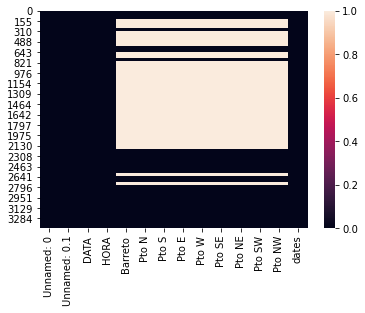

In [90]:
import seaborn as sns

sns.heatmap(prec_full.where(prec_full['HORA']<=25).dropna(how='all').isnull())

In [93]:
prec_full_sorted = prec_full.where(prec_full['HORA']<=25).dropna(how='all').sort_values('dates')

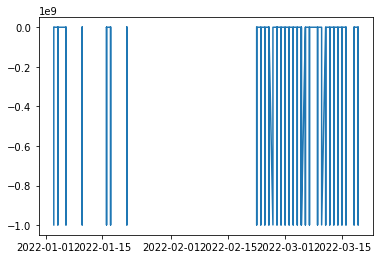

In [104]:
import matplotlib.pyplot as plt
plt.plot(prec_full_sorted['dates'],prec_full_sorted['Barreto'])

<AxesSubplot:>

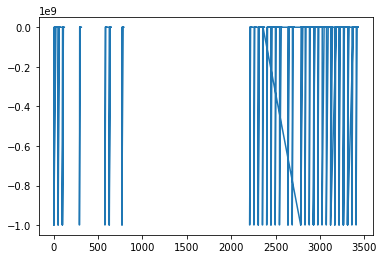

In [103]:
prec_full_sorted['Barreto'].plot()

In [107]:
_prec_full.where(_prec_full['DATA']==20220210).dropna(how='all')

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW
1728,0.0,0.0,20220210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1729,1.0,1.0,20220210.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1730,2.0,2.0,20220210.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,3.0,3.0,20220210.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1732,4.0,4.0,20220210.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733,5.0,5.0,20220210.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,6.0,6.0,20220210.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,7.0,7.0,20220210.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,8.0,8.0,20220210.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1737,9.0,9.0,20220210.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Looking for exact dates missing

In [6]:
import pandas as pd
_prec_full = pd.read_csv('/mnt/d/_LocalGab/prec_full.csv')
nul = _prec_full.where(_prec_full['Barreto'].isnull()).dropna(how='all')
nul

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,Barreto,Pto N,Pto S,Pto E,Pto W,Pto SE,Pto NE,Pto SW,Pto NW
144,0.0,0.0,20220107.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,1.0,1.0,20220107.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2.0,2.0,20220107.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,3.0,3.0,20220107.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,4.0,4.0,20220107.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,43.0,43.0,20220320.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2780,44.0,44.0,20220320.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2781,45.0,45.0,20220320.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2782,46.0,46.0,20220320.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
str(list(nul['DATA'].unique())[0])[6:8]

'07'

In [9]:
import datetime as dt

In [20]:
_prec_full['datetime'] = _prec_full["DATA"].apply(lambda x: dt.datetime(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:8])  ) )

In [22]:
dates = list(_prec_full['datetime'])
initial = dates[0]
last = dates[-1]

In [27]:
starter = initial
lista_nao_rodou = []

while starter <= last:
    if starter not in dates:
        lista_nao_rodou.append(starter)    
    
    starter += dt.timedelta(days=1)

In [28]:
lista_nao_rodou

[Timestamp('2022-01-05 00:00:00'),
 Timestamp('2022-01-19 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-03-08 00:00:00')]